<a href="https://colab.research.google.com/github/jvataidee/PesquisaOperacional/blob/master/cadeias_de_markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cadeias de Markov com Python
---

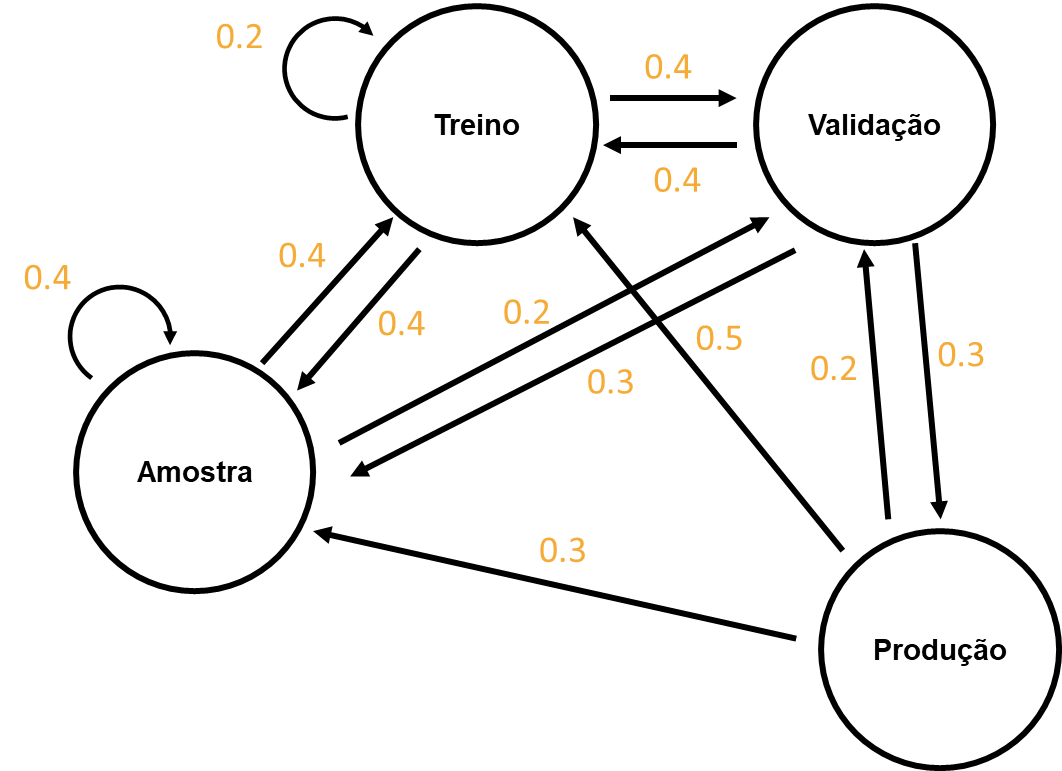

In [ ]:
import numpy as np
import random as rm
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
estados_desenvolvimento = ["Amostra", "Treino", "Validação","Produção"]
sequencias = [["Amostra - Amostra", "Amostra - Treino", "Amostra - Validação", "Amostra - Produção"],
              ["Treino - Amostra", "Treino - Treino", "Treino - Validação", "Treino - Produção"],
              ["Validação - Amostra", "Validação - Treino", "Validação - Validação", "Validação - Produção"],
              ["Produção - Amostra", "Produção - Treino", "Produção - Validação", "Produção - Produção"]]

prob_sequencia = [[0.4, 0.4, 0.2, 0.0],
                  [0.4, 0.2, 0.4, 0.0],
                  [0.3, 0.4, 0.0, 0.3],
                  [0.3, 0.5, 0.2, 0.0]]

In [ ]:
for idex, value in enumerate(sequencias):
    print(value[0], "Prob:", prob_sequencia[idex][0])
    print(value[1], "Prob:", prob_sequencia[idex][1])
    print(value[2], "Prob:", prob_sequencia[idex][2])
    print(value[3], "Prob:", prob_sequencia[idex][3])

    print("Probabilidade Total", prob_sequencia[idex][0]+prob_sequencia[idex][1]+prob_sequencia[idex][2]+prob_sequencia[idex][3], "\n")

Amostra - Amostra Prob: 0.4
Amostra - Treino Prob: 0.4
Amostra - Validação Prob: 0.2
Amostra - Produção Prob: 0.0
Probabilidade Total 1.0 

Treino - Amostra Prob: 0.4
Treino - Treino Prob: 0.2
Treino - Validação Prob: 0.4
Treino - Produção Prob: 0.0
Probabilidade Total 1.0 

Validação - Amostra Prob: 0.3
Validação - Treino Prob: 0.4
Validação - Validação Prob: 0.0
Validação - Produção Prob: 0.3
Probabilidade Total 1.0 

Produção - Amostra Prob: 0.3
Produção - Treino Prob: 0.5
Produção - Validação Prob: 0.2
Produção - Produção Prob: 0.0
Probabilidade Total 1.0 



In [ ]:
#Criando classe de Markov
class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in range(len(self.states))}
        self.states_dict = {index: self.states[index] for index in range(len(self.states))}

    #Definir função do estado futuro
    def next_state(self,current_state):
        return np.random.choice( self.states,
            p = self.transition_matrix[self.index_dict[current_state], :])

    #Gerar estados d problema
    def generate_states(self, current_state, no = 10):
        future_states = []
        epoc = []

        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            epoc.append(i)
            current_state = next_state

        return future_states, epoc

In [ ]:
atividades_modelo = MarkovChain(transition_matrix = prob_sequencia,
                                states = estados_desenvolvimento)

In [ ]:
atividades_modelo.next_state(current_state='Amostra')

'Treino'

In [ ]:
numero_semanas  = 10
resultado = atividades_modelo.generate_states(current_state='Amostra', no = numero_semanas)
resultado[0]

['Treino',
 'Validação',
 'Produção',
 'Treino',
 'Validação',
 'Produção',
 'Amostra',
 'Validação',
 'Produção',
 'Treino']

In [ ]:
resultado_count = pd.DataFrame(resultado[0]).value_counts()
resultado_count

Produção     3
Treino       3
Validação    3
Amostra      1
dtype: int64